<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_06/week05_solution4task_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tarfile
import requests

In [ ]:
# 데이터 다운로드
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filename = "aclImdb_v1.tar.gz"

train_response = requests.get(url)

with open(filename, "wb") as f:
    f.write(train_response.content)
    print("✅ 다운로드 완료")

✅ 다운로드 완료


In [ ]:
# 압축 해제
with tarfile.open(filename, "r:gz") as tar:
    tar.extractall()
print("✅ 압축 해제 완료")

✅ 압축 해제 완료


In [ ]:
# 리뷰 파일 경로 예시 (긍정 리뷰 하나)
file_path = "aclImdb/train/pos/0_9.txt"

# 파일 읽기
with open(file_path, "r", encoding="utf-8") as f:
    review_text = f.read()

print("✅ 리뷰 샘플:\n")
print(review_text[:500])  # 앞부분 출력

✅ 리뷰 샘플:

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a s


In [ ]:
import glob

pos_files = glob.glob("aclImdb/train/pos/*.txt")
pos_reviews = []

for file in pos_files[:100]:  # 100개만 예시
    with open(file, "r", encoding="utf-8") as f:
        pos_reviews.append(f.read())

len(pos_reviews)

100

In [ ]:
# 2. 라이브러리 임포트
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 3. NLTK 리소스 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 4. 불용어 설정
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# 5. 긍정 리뷰 100개 로드
pos_files = glob.glob("aclImdb/train/pos/*.txt")
pos_files

['aclImdb/train/pos/7754_9.txt',
 'aclImdb/train/pos/10698_9.txt',
 'aclImdb/train/pos/2597_8.txt',
 'aclImdb/train/pos/6890_8.txt',
 'aclImdb/train/pos/1258_9.txt',
 'aclImdb/train/pos/10974_10.txt',
 'aclImdb/train/pos/10932_7.txt',
 'aclImdb/train/pos/8195_10.txt',
 'aclImdb/train/pos/6561_10.txt',
 'aclImdb/train/pos/4865_7.txt',
 'aclImdb/train/pos/3485_9.txt',
 'aclImdb/train/pos/3530_7.txt',
 'aclImdb/train/pos/10293_8.txt',
 'aclImdb/train/pos/7166_9.txt',
 'aclImdb/train/pos/6104_10.txt',
 'aclImdb/train/pos/4920_7.txt',
 'aclImdb/train/pos/2461_10.txt',
 'aclImdb/train/pos/7419_10.txt',
 'aclImdb/train/pos/10857_8.txt',
 'aclImdb/train/pos/3599_8.txt',
 'aclImdb/train/pos/4503_7.txt',
 'aclImdb/train/pos/11563_10.txt',
 'aclImdb/train/pos/5490_9.txt',
 'aclImdb/train/pos/7531_8.txt',
 'aclImdb/train/pos/6271_9.txt',
 'aclImdb/train/pos/1451_8.txt',
 'aclImdb/train/pos/7079_9.txt',
 'aclImdb/train/pos/5653_10.txt',
 'aclImdb/train/pos/9020_7.txt',
 'aclImdb/train/pos/8024_10.t

In [ ]:
pos_reviews = []
for file in pos_files[:100]:
    with open(file, "r", encoding="utf-8") as f:
        pos_reviews.append(f.read())

# 6. 모든 리뷰 연결 후 소문자화
text = " ".join(pos_reviews).lower()
text

'any way the wind blows is tom barmans (who is also know as front man of the rock formation \'deus\') debut movie. entirely shot in antwerp (belgium), the movie starts on a sunny friday morning and skips rather superficially between the events that fill the day of a dozen of main characters. when the movie ends, you have a lot of stuff to think about, because most of the different story-lines are left wide open.<br /><br />the movie has a (purely instrumental) sound track that will rock your socks off. in most scenes, the music truly enhances the general atmosphere and feel, really making the movie hallucinating to watch at certain points of time. the main scene in the film, the party, is very well shot.<br /><br />the director didn\'t hesitate to use video clip techniques, having his main characters dancing on one of the best sound tracks i\'ve heard lately.<br /><br />the screenplay is great stuff. camera angles and colors are very well chosen. the \'costumes\' are very hot and very 

In [ ]:
nltk.download('punkt_tab')

# 7. 토큰화
tokens = word_tokenize(text)
tokens

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['any',
 'way',
 'the',
 'wind',
 'blows',
 'is',
 'tom',
 'barmans',
 '(',
 'who',
 'is',
 'also',
 'know',
 'as',
 'front',
 'man',
 'of',
 'the',
 'rock',
 'formation',
 "'deus",
 "'",
 ')',
 'debut',
 'movie',
 '.',
 'entirely',
 'shot',
 'in',
 'antwerp',
 '(',
 'belgium',
 ')',
 ',',
 'the',
 'movie',
 'starts',
 'on',
 'a',
 'sunny',
 'friday',
 'morning',
 'and',
 'skips',
 'rather',
 'superficially',
 'between',
 'the',
 'events',
 'that',
 'fill',
 'the',
 'day',
 'of',
 'a',
 'dozen',
 'of',
 'main',
 'characters',
 '.',
 'when',
 'the',
 'movie',
 'ends',
 ',',
 'you',
 'have',
 'a',
 'lot',
 'of',
 'stuff',
 'to',
 'think',
 'about',
 ',',
 'because',
 'most',
 'of',
 'the',
 'different',
 'story-lines',
 'are',
 'left',
 'wide',
 'open.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'the',
 'movie',
 'has',
 'a',
 '(',
 'purely',
 'instrumental',
 ')',
 'sound',
 'track',
 'that',
 'will',
 'rock',
 'your',
 'socks',
 'off',
 '.',
 'in',
 'most',
 'scenes',
 ',',
 '

In [ ]:
# 7. 불용어 제거
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]


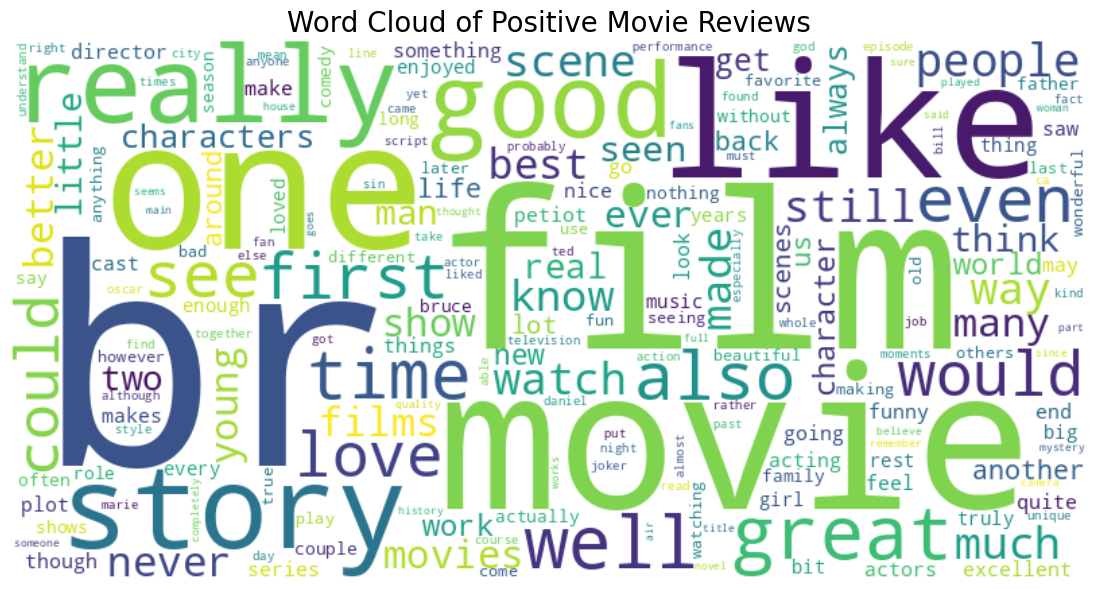

In [ ]:

# 8. 단어 빈도 계산
word_freq = Counter(tokens)

# 9. 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 10. 시각화
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Positive Movie Reviews", fontsize=20)
plt.show()


In [ ]:
word_freq

Counter({'way': 30,
         'wind': 1,
         'blows': 1,
         'tom': 4,
         'barmans': 1,
         'also': 39,
         'know': 29,
         'front': 1,
         'man': 23,
         'rock': 2,
         'formation': 1,
         'debut': 3,
         'movie': 119,
         'entirely': 2,
         'shot': 3,
         'antwerp': 1,
         'belgium': 1,
         'starts': 3,
         'sunny': 1,
         'friday': 2,
         'morning': 2,
         'skips': 1,
         'rather': 10,
         'superficially': 1,
         'events': 2,
         'fill': 1,
         'day': 10,
         'dozen': 1,
         'main': 8,
         'characters': 22,
         'ends': 4,
         'lot': 17,
         'stuff': 2,
         'think': 24,
         'different': 11,
         'left': 6,
         'wide': 1,
         'br': 328,
         'purely': 1,
         'instrumental': 1,
         'sound': 4,
         'track': 2,
         'socks': 1,
         'scenes': 17,
         'music': 13,
         'truly':

In [ ]:
# 상위 N개 단어 보기
top_10 = word_freq.most_common(10)
print("🔹 Top 10 most frequent words:")
for word, freq in top_10:
    print(f"{word}: {freq}")


🔹 Top 10 most frequent words:
br: 328
film: 145
movie: 119
one: 97
like: 76
story: 64
really: 57
good: 54
great: 47
well: 45


In [ ]:

# 전체 단어 수 (중복 포함)
total_words = sum(word_freq.values())
print(f"\n🔹 Total number of words (with repetition): {total_words}")

# 고유 단어 수
unique_words = len(word_freq)
print(f"🔹 Number of unique words: {unique_words}")



🔹 Total number of words (with repetition): 10230
🔹 Number of unique words: 3934


In [ ]:

# 평균 단어 등장 횟수
avg_freq = total_words / unique_words
print(f"🔹 Average word frequency: {avg_freq:.2f}")

# 등장 횟수 기준 상위 5%, 하위 5% 단어 분포
sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
top_5_percent = sorted_freq[:int(0.05 * unique_words)]
bottom_5_percent = sorted_freq[-int(0.05 * unique_words):]

print(f"\n🔹 Top 5% words count: {len(top_5_percent)}")
print(f"🔹 Bottom 5% words count: {len(bottom_5_percent)}")


🔹 Average word frequency: 2.60

🔹 Top 5% words count: 196
🔹 Bottom 5% words count: 196


In [ ]:

# 가장 많이 등장한 단어
most_common_word, most_common_freq = word_freq.most_common(1)[0]
print(f"\n🔹 Most frequent word: '{most_common_word}' ({most_common_freq} times)")

# 등장 횟수가 1회인 단어 수
one_time_words = [word for word, count in word_freq.items() if count == 1]
print(f"🔹 Words that appear only once: {len(one_time_words)}")



🔹 Most frequent word: 'br' (328 times)
🔹 Words that appear only once: 2426
